In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv('NY-House-Dataset 1.csv')

In [127]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [129]:
df_filtered = df.drop(["BROKERTITLE", "MAIN_ADDRESS", "ADDRESS", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "STREET_NAME", "FORMATTED_ADDRESS", "LONG_NAME"], axis =1)

In [138]:

# converting catagircial data to boolean vals
df_filtered = pd.get_dummies(df_filtered).astype(int)
print(df_filtered.head())
y_data = df_filtered["PRICE"]
x_data = df_filtered.drop("PRICE", axis=1)

       PRICE  BEDS  BATH  PROPERTYSQFT  LATITUDE  LONGITUDE  \
0     315000     2     2          1400        40        -73   
1  195000000     7    10         17545        40        -73   
2     260000     4     2          2015        40        -74   
3      69000     3     1           445        40        -73   
4   55000000     7     2         14175        40        -73   

   TYPE_Co-op for sale  TYPE_Coming Soon  TYPE_Condo for sale  \
0                    0                 0                    1   
1                    0                 0                    1   
2                    0                 0                    0   
3                    0                 0                    1   
4                    0                 0                    0   

   TYPE_Condop for sale  ...  SUBLOCALITY_New York  \
0                     0  ...                     0   
1                     0  ...                     0   
2                     0  ...                     0   
3             

In [139]:
# now we shoudl scale all the numerical data and ignore all boolean values 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_data = x_data[["BEDS", "BATH", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]]
numeric_data = scaler.fit_transform(numeric_data)
x_data[["BEDS", "BATH", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]] = numeric_data
x_data

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_Co-op for sale,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Condop for sale,TYPE_Contingent,...,SUBLOCALITY_New York,SUBLOCALITY_New York County,SUBLOCALITY_Queens,SUBLOCALITY_Queens County,SUBLOCALITY_Rego Park,SUBLOCALITY_Richmond County,SUBLOCALITY_Riverdale,SUBLOCALITY_Snyder Avenue,SUBLOCALITY_Staten Island,SUBLOCALITY_The Bronx
0,0.020408,0.04,0.017916,0.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.122449,0.20,0.265140,0.0,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.061224,0.04,0.027333,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.040816,0.02,0.003292,0.0,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.122449,0.04,0.213536,0.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,0.000000,0.02,0.029921,0.0,1.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4797,0.000000,0.02,0.029921,0.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4798,0.000000,0.02,0.029921,0.0,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4799,0.020408,0.02,0.006508,0.0,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [140]:
# scalign data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
y_data = scaler.fit_transform(y_data.values.reshape(-1,1))
y_data

array([[-0.99970896],
       [-0.81839421],
       [-0.99976018],
       ...,
       [-0.99881489],
       [-0.99944527],
       [-0.99967729]])

In [141]:
x_data.head()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_Co-op for sale,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Condop for sale,TYPE_Contingent,...,SUBLOCALITY_New York,SUBLOCALITY_New York County,SUBLOCALITY_Queens,SUBLOCALITY_Queens County,SUBLOCALITY_Rego Park,SUBLOCALITY_Richmond County,SUBLOCALITY_Riverdale,SUBLOCALITY_Snyder Avenue,SUBLOCALITY_Staten Island,SUBLOCALITY_The Bronx
0,0.020408,0.04,0.017916,0.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.122449,0.20,0.265140,0.0,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.061224,0.04,0.027333,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.040816,0.02,0.003292,0.0,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.122449,0.04,0.213536,0.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [142]:
# now there are 50 features in the dataset

# now we will split the data into training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# now time to make the model 

from keras.models import Sequential
from keras.layers import Dense,Input
from keras import activations

# model layers
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(50,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='tanh'))

# compile and use model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['root_mean_squared_error'])
model.summary()
model.fit(x_train, y_train, epochs=20, batch_size=32)

c:\Users\kani2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 200)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,101 (766.02 KB)

 Trainable params: 196,101 (766.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1809 - root_mean_squared_error: 0.3777
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.7229e-04 - root_mean_squared_error: 0.0232
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - root_mean_squared_error: 0.0324
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8550e-04 - root_mean_squared_error: 0.0099
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1025e-04 - root_mean_squared_error: 0.0162
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7261e-04 - root_mean_squared_error: 0.0089
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8648e-04 - root_mean_squared_error: 0.0123
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.4879e-04 - root_mean_squared_error: 0.0226
Epoch 9/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.8088e-04 - root_mean_squared_error: 0.0177
Epoch 10/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.

In [143]:
model.evaluate(x_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7925e-05 - root_mean_squared_error: 0.0053 


[2.5125746105914004e-05, 0.005012558773159981]

In [144]:
# now let sget the actual dollar amount for the price

pred = model.predict(x_test)
y_dollar = scaler.inverse_transform(y_test)
print(y_dollar)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[7.500000e+05]
 [8.990000e+05]
 [5.900000e+06]
 [1.695000e+06]
 [2.650000e+05]
 [3.795000e+06]
 [2.400000e+06]
 [7.780000e+05]
 [9.990000e+05]
 [7.890000e+05]
 [1.169900e+06]
 [7.900000e+05]
 [3.450000e+05]
 [4.195000e+06]
 [5.990000e+05]
 [1.465000e+06]
 [6.190000e+05]
 [4.300000e+05]
 [2.990000e+05]
 [2.950000e+06]
 [1.999990e+05]
 [9.250000e+05]
 [4.250000e+05]
 [2.250000e+07]
 [9.890000e+05]
 [7.990000e+05]
 [1.348000e+06]
 [1.090000e+05]
 [2.999000e+06]
 [2.490000e+05]
 [1.195000e+06]
 [4.490000e+05]
 [5.600000e+05]
 [1.200000e+06]
 [2.350000e+06]
 [4.490000e+05]
 [3.499000e+05]
 [2.750000e+05]
 [3.400000e+06]
 [5.250000e+05]
 [8.480000e+05]
 [3.790000e+05]
 [1.599999e+06]
 [2.690000e+05]
 [4.990000e+05]
 [2.300000e+05]
 [7.500000e+05]
 [1.890000e+05]
 [1.848880e+05]
 [7.990000e+05]
 [2.890000e+05]
 [2.880000e+05]
 [1.880000e+06]
 [2.650000e+05]
 [1.149000e+06]
 [5.750000e+05]
 [3.995000e+06]
 [1.350888e+06]
 [3.300000e+05]
 [3.165000e+06]
 

In [145]:
# now we will use liner regression to pridict the price
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(x_train, y_train)

y_pred = reg.predict(x_test)
y_pred = scaler.inverse_transform(y_pred).astype(int)

print(y_pred)

[[    6138294]
 [    1763771]
 [    5736887]
 [     616893]
 [-2147483648]
 [    1649084]
 [    2558395]
 [    4680120]
 [     215485]
 [    2034107]
 [    -480833]
 [    1911227]
 [    -972352]
 [   12052911]
 [    7399861]
 [    3377594]
 [    6203830]
 [     780733]
 [    -972352]
 [    2984378]
 [     715197]
 [   -2520639]
 [    1190332]
 [   13478318]
 [    -677441]
 [    2599354]
 [   -2397759]
 [    1288636]
 [    1894843]
 [    -333377]
 [    5679543]
 [      92605]
 [    1395132]
 [   -1349184]
 [   11217328]
 [    2034107]
 [   -1242688]
 [   -3126846]
 [    9128371]
 [     199101]
 [    -235073]
 [     739773]
 [    -579137]
 [   -1644096]
 [    6498742]
 [     100797]
 [    2042299]
 [    -382529]
 [   -2070079]
 [    -611905]
 [   -1840703]
 [     313789]
 [   -1857087]
 [    5368247]
 [    2525627]
 [    -226881]
 [   12593583]
 [   -1349184]
 [   -1152576]
 [     649661]
 [    5958071]
 [   -2160191]
 [    -677441]
 [    6818230]
 [    5155256]
 [     715197]
 [    2034

C:\Users\kani2\AppData\Local\Temp\ipykernel_13456\3411458832.py:8: RuntimeWarning: invalid value encountered in cast
  y_pred = scaler.inverse_transform(y_pred).astype(int)


In [146]:
# lets check how good the model is 
mean_squared_error(y_dollar, y_pred)

1.4449710224466368e+16

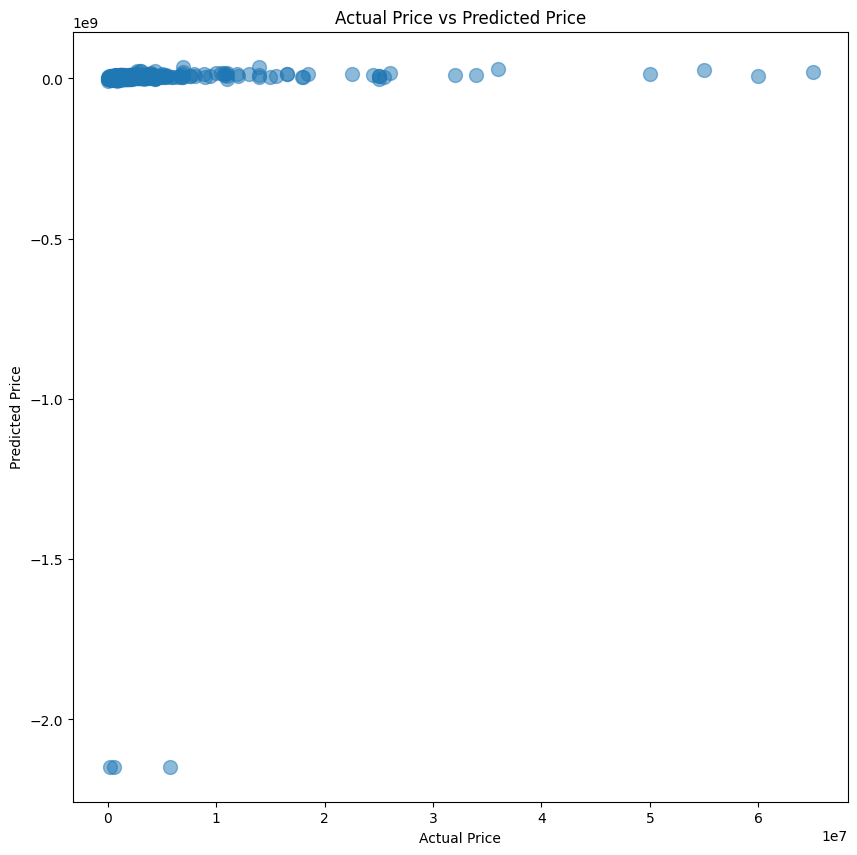

In [147]:
# lets plot the data
plt.figure(figsize=(10,10))
plt.scatter(y_dollar, y_pred, s=100, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()